<a href="https://colab.research.google.com/github/sku-KKS/2021_ICT_Innovation/blob/main/211024/wine_quality_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from google.colab import drive
import numpy as np

In [2]:
drive.mount('/content/ex5')

Drive already mounted at /content/ex5; to attempt to forcibly remount, call drive.mount("/content/ex5", force_remount=True).


In [3]:
r_df = pd.read_csv('/content/ex5/MyDrive/winequality-red.csv' ,sep = ';')
w_df = pd.read_csv('/content/ex5/MyDrive/winequality-white.csv', sep = ';')

In [4]:
from sklearn.preprocessing import StandardScaler

std_cols = ['fixed acidity', 'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol'	,'quality']

scaler = StandardScaler()

r_df_scaled = scaler.fit_transform(r_df[std_cols])
r_df_scaled = pd.DataFrame(r_df_scaled, columns = std_cols)
w_df_scaled = scaler.fit_transform(w_df[std_cols])
w_df_scaled = pd.DataFrame(w_df_scaled, columns = std_cols)

In [5]:
r_df['color'] = 'red'
w_df['color'] = 'white'

In [6]:
df = pd.concat([r_df, w_df], axis=0)
print(df.shape)

(6497, 13)


In [7]:
#shuffle
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5,white
1,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,red
2,7.1,0.320,0.29,4.0,0.038,33.0,170.0,0.99463,3.27,0.64,10.2,6,white
3,6.1,0.240,0.26,1.7,0.033,61.0,134.0,0.99030,3.19,0.81,11.9,7,white
4,7.5,0.190,0.49,1.6,0.047,42.0,140.0,0.99320,3.40,0.47,10.7,6,white
5,7.7,0.260,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,6,red
6,6.2,0.280,0.51,7.9,0.056,49.0,206.0,0.99560,3.18,0.52,9.4,5,white
7,6.4,0.250,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,6,white
8,9.9,0.740,0.28,2.6,0.078,21.0,77.0,0.99800,3.28,0.51,9.8,5,red
9,4.4,0.460,0.10,2.8,0.024,31.0,111.0,0.98816,3.48,0.34,13.1,6,white


In [8]:
df['color'] = df['color'].replace('red', 0)
df['color'] = df['color'].replace('white', 1)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,6.7,0.540,0.28,5.4,0.060,21.0,105.0,0.99490,3.27,0.37,9.0,5,1
1,15.5,0.645,0.49,4.2,0.095,10.0,23.0,1.00315,2.92,0.74,11.1,5,0
2,7.1,0.320,0.29,4.0,0.038,33.0,170.0,0.99463,3.27,0.64,10.2,6,1
3,6.1,0.240,0.26,1.7,0.033,61.0,134.0,0.99030,3.19,0.81,11.9,7,1
4,7.5,0.190,0.49,1.6,0.047,42.0,140.0,0.99320,3.40,0.47,10.7,6,1


In [9]:
feature_df = df[df.columns.difference(['color'])]
label_df = df['color']
print(feature_df.shape, label_df.shape)

(6497, 12) (6497,)


In [10]:
feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()
print(feature_np.shape, label_np.shape)

(6497, 12) (6497,)


In [11]:
# train / test data 분리
split = 0.15

test_num = int(split*len(label_np))

x_test = feature_np[0:test_num]
y_test = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5523, 12) (5523,)
(974, 12) (974,)


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12, )))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy', metrics=['accuracy'])

from datetime import datetime

start_time = datetime.now()
hist = model.fit(x_train, y_train, epochs=200, validation_data=(x_test, y_test))
end_time = datetime.now()
print('elapsed time => ', end_time-start_time)

model.evaluate(x_test, y_test)

elapsed time =>  0:01:22.515119
31/31 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9887


[0.05094584822654724, 0.9887063503265381]

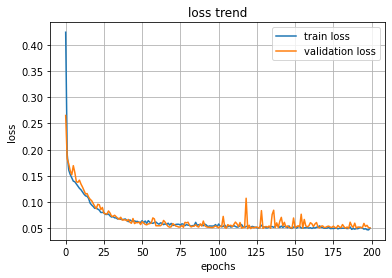

In [13]:
plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')

plt.show()

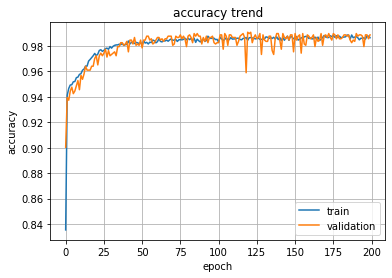

In [14]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.title('accuracy trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()